Load data

In [409]:
import pandas as pd
from igraph import *
import cairo
import numpy as np
import numpy.random as random
import math
from matplotlib import pyplot as plt
from scipy.stats import bernoulli

In [410]:
# create attribute list
# easy for this file because the first 6 columns are in fact attribute list
attr_list = pd.read_csv('HTTLPR.csv', usecols=[0, 1, 2, 3, 4, 5])
attr_list['PaperID'] = attr_list.index

# create edge list
matrix = pd.read_csv('HTTLPR.csv')
attr_list

,Study,Year,YearOnline,Outcome,OutcomeSmallestPvalue,Abstract,PaperID
0,Mossner,2001,2001,Positive,Positive,Positive,0
1,Caspi,2003,2003,Positive,Positive,Positive,1
2,Eley,2004,2004,Negative,Negative,Positive,2
3,Grabe_a,2005,2004,Unclear,Unclear,Partially supportive,3
4,Kaufman_a,2004,2004,Positive,Positive,Positive,4
...,...,...,...,...,...,...,...
68,Grabe_b,2012,2012,Negative,Negative,Partially supportive,68
69,Petersen,2012,2012,Positive,Positive,Positive,69
70,Beaver,2012,2012,Positive,Positive,Partially supportive,70
71,Brown,2013,2012,Negative,Positive,Positive,71


In [411]:
# select only the adjacency matrix
matrix = matrix.iloc[:, 6:]
matrix

,Mossner,Caspi,Eley,Grabe_a,Kaufman_a,Gillespie,Kendler,Surtees,Sjoberg,Nakatani,...,Comasco_a,Cicchetti_b,Jenness,Scheid_b,Quinn,Grabe_b,Petersen,Beaver,Brown,Wilhelm_b
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-,X,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-,X,-,-,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,-,X,-,X,-,-,X,-,X,-,...,-,-,-,-,-,NaN,NaN,NaN,NaN,NaN
69,-,X,X,-,-,-,X,X,X,-,...,-,-,-,-,-,-,NaN,NaN,NaN,NaN
70,-,X,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,NaN,NaN,NaN
71,-,X,X,-,-,-,-,-,X,-,...,-,-,-,-,-,-,-,-,NaN,NaN


In [412]:
# search_for_alias
search_dict = pd.Series(attr_list['PaperID'].values, index=attr_list['Study']).to_dict()
search_dict_reverse = pd.Series(attr_list['Study'].values, index=attr_list['PaperID']).to_dict()
matrix.columns = [search_dict[x] for x in matrix.columns]
matrix


,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-,X,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-,X,-,-,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,-,X,-,X,-,-,X,-,X,-,...,-,-,-,-,-,NaN,NaN,NaN,NaN,NaN
69,-,X,X,-,-,-,X,X,X,-,...,-,-,-,-,-,-,NaN,NaN,NaN,NaN
70,-,X,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,NaN,NaN,NaN
71,-,X,X,-,-,-,-,-,X,-,...,-,-,-,-,-,-,-,-,NaN,NaN


Reconstruct claim-specific citation network g

In [413]:
# initialize the graph object
g = Graph(directed=True)
g.add_vertices(73)

# add attributes to the graph: study name: name; study outcome: outcome; YearOnline: year
study = attr_list['Study'].to_list()
outcome = attr_list['Outcome'].to_list()
g.vs['name'] = study
g.vs["label"] = g.vs["name"]
g.vs['outcome'] = outcome
g.vs['Year'] = attr_list['YearOnline']
g.vs['color'] = 'light blue'

# create edges for the real graph, using the matrix
edge_list = []
for i in range(0, matrix.shape[0]):
    for j in range(0, matrix.shape[1]):
        if isinstance(matrix.iloc[i, j], str):
            s = matrix.iloc[i, j]
            if s.replace(" ", "") == "X":
                edge_list.append((i, j))
                g.add_edge(source=i, target=j)
len(g.es)

488

Visualize the network

In [435]:
vis = plot(g,layout="kk", margin=50,bbox=(600,600),vertex_label_size=10,edge_arrow_size=0.5,edge_arrow_width=1.5)
vis.show()

Calculate the probability for each year

In [415]:
# potential graph
year_gap = 1

g_full = Graph(directed=True)
g_full.add_vertices(73)
g_full.vs['name'] = study
g_full.vs["label"] = g_full.vs["name"]
g_full.vs['outcome'] = outcome
g_full.vs['Year'] = attr_list['YearOnline']

full_edge_list=[]

for i in g_full.vs.indices:
    for j in g_full.vs.indices:
        if i>j and (g.vs[i]['Year']-g.vs[j]['Year']>=year_gap):
            full_edge_list.append((i,j))
            g_full.add_edge(source=i,target=j)
g_full.get_edge_dataframe()

,source,target
edge ID,,
0,1,0
1,2,0
2,2,1
3,3,0
4,3,1
...,...,...
2343,72,62
2344,72,63
2345,72,64


In [416]:
Year_source = np.unique(g.vs(g_full.get_edge_dataframe().source)['Year'])
prob = [len(g.es.select(_source_in=g.vs.select(Year=year).indices))
        /len(g_full.es.select(_source_in=g_full.vs.select(Year=year).indices)) for year in Year_source]
# replace the first 0 with 0.5
prob[0] = 0.5
prob = pd.Series(prob,index=Year_source)
n = [len(g_full.es.select(_source_in=g_full.vs.select(Year=year).indices)) for year in Year_source]
num = pd.Series(n,index=Year_source)
num

2003      1
2004      8
2005     24
2006     80
2007    198
2008    232
2009    407
2010    336
2011    660
2012    402
dtype: int64

Create the simulated network

In [417]:
# initialize simulated network g_sim
g_sim = Graph(directed=True)
g_sim.add_vertices(73)
g_sim.vs['name'] = study
g_sim.vs["label"] = g_sim.vs["name"]
g_sim.vs['outcome'] = outcome
g_sim.vs["color"] = 'light blue'
g_sim.vs['Year'] = attr_list['YearOnline']

sim_edge_list = []

In [418]:
# construct graph
random.seed(1)
for year in Year_source:
    g_full.es.select(_source_in=g_full.vs.select(Year=year).indices)['Citation']=bernoulli.rvs(prob[year],size=num[year])

edge_dataframe = g_full.get_edge_dataframe()
sim_edge_dataframe = edge_dataframe.loc[edge_dataframe['Citation']==1]

for i in range(0,sim_edge_dataframe.shape[0]):
    sim_edge_list.append((sim_edge_dataframe.iloc[i,]['source'],sim_edge_dataframe.iloc[i,]['target']))
    g_sim.add_edge(source=sim_edge_dataframe.iloc[i,]['source'],target=sim_edge_dataframe.iloc[i,]['target'])

vis = plot(g_sim,layout="kk", margin=50,bbox=(600,600),vertex_label_size=10,edge_arrow_size=0.5,edge_arrow_width=1.5)
vis.show()

In [419]:
# simulate for 1000 times
avg_degree_sim = pd.DataFrame(columns=[str(p)+"'s degree" for p in range(1000)],index=g.vs["label"])
for p in range(1000):
    g_sim=Graph(directed=True)
    g_sim.add_vertices(73)
    g_sim.vs['Year'] = attr_list['YearOnline']
    sim_edge_list = []

    for year in Year_source:
        g_full.es.select(_source_in=g_full.vs.select(Year=year).indices)['Citation']=bernoulli.rvs(prob[year],size=num[year])

    edge_dataframe = g_full.get_edge_dataframe()
    sim_edge_dataframe = edge_dataframe.loc[edge_dataframe['Citation']==1]

    for i in range(0,sim_edge_dataframe.shape[0]):
        sim_edge_list.append((sim_edge_dataframe.iloc[i,]['source'],sim_edge_dataframe.iloc[i,]['target']))
        g_sim.add_edge(source=sim_edge_dataframe.iloc[i,]['source'],target=sim_edge_dataframe.iloc[i,]['target'])

    avg_degree_sim[str(p)+"'s degree"]=g_sim.indegree()

In [420]:
g_degree = pd.Series(data=g.indegree(),index=g.vs.indices)
g_degree

0      5
1     65
2     37
3     21
4     27
      ..
68     0
69     0
70     0
71     0
72     0
Length: 73, dtype: int64

In [439]:
g_sim_degree = pd.Series(data=np.average(avg_degree_sim,axis=1),index=g.vs.indices)
g_sim_degree

0     20.990
1     20.624
2     18.622
3     18.401
4     18.396
       ...  
68     0.000
69     0.000
70     0.000
71     0.000
72     0.000
Length: 73, dtype: float64

Calculating metric: the ratio between real and theoretical citations

In [422]:
degree_ratio = pd.DataFrame(columns=['paperID','degree_ratio'])

last_generation = []

for idx, degree in enumerate(g_degree):
    if g_sim_degree[idx]!=0:
        degree_ratio = degree_ratio.append({'paperID': idx, 'degree_ratio': round(g_degree[idx] / g_sim_degree[idx],3)},
                            ignore_index=True)
    else:
        last_generation.append(idx) # not suppose to have citations because of the constructs

In [423]:
low_cutoff = 0.1
high_cutoff = 0.9
idx_low = degree_ratio[degree_ratio['degree_ratio'] < low_cutoff].index.tolist()
idx_low = [int(item) for item in idx_low]

idx_high = degree_ratio[degree_ratio['degree_ratio'] > high_cutoff].index.tolist()
idx_high = [int(item) for item in idx_high]
len(idx_low)

14

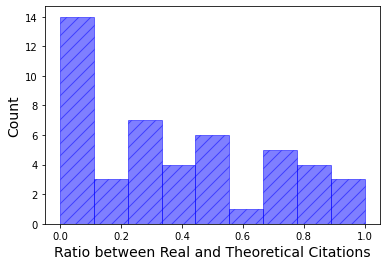

In [424]:
bins = np.linspace(0,1,10)
plt.hist(degree_ratio['degree_ratio'], bins=bins,color='blue', edgecolor='blue', linewidth=1, hatch="//",
         histtype='bar', alpha=0.5)
plt.xlabel('Ratio between Real and Theoretical Citations',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.show()

In [440]:
for node in g.vs.indices:
    if node in idx_low:
        g.vs[node]['citation_ratio'] = 'Low'
    elif node in idx_high:
        g.vs[node]['citation_ratio'] = 'High'
    elif node in last_generation:
        g.vs[node]['citation_ratio'] = 'Last Generation'
    else:
        g.vs[node]['citation_ratio'] = 'Average'

# block of code for visualization [ update here ]
color_dict = {"High": "green", "Low": "pink", "Average": "light blue","Last Generation":"white"}
g.vs["color"] = [color_dict[ratio] for ratio in g.vs["citation_ratio"]]
plot(g,bbox=(600,600),margin=50,layout="kk",vertex_label_size=10,edge_arrow_size=0.5,edge_arrow_width=1.5).show()

In [426]:
for node in idx_low:
    print(g.vs[node]['name'],g.vs[node]['Year'],g.vs[node]['outcome'])

Zhang_a 2008 Negative
Zhang_b 2009 Negative
Grassi 2010 Negative
Sen 2010 Positive
Antypa 2010 Negative
Conway 2010 Negative
Stefanis 2011 Negative
Mitchell 2011 Negative
Tsuboi 2011 Positive
Carli 2011 Negative
Comasco_a 2011 Unclear
Cicchetti_b 2011 Negative
Jenness 2011 Negative
Scheid_b 2011 Negative
